# Question 1
Créez une macro appelée `NromACT` que lorsque l'utilisateur l'exécute, il obtient un aperçu des 3 premières observations des 10000 v.a générés par une distribution normale. Nous laissons le choix à l'utilisateur de fixer la moyenne, l'écart type et le _seed_

Cette macro devrait aussi afficher deux graphiques;  
1. le premier trace la fonction de masse des v.a générées.
2. le second trace la fonction de répartition des v.a générées.


In [35]:
%macro NromACT(mu, sigma,graine);
    title;
    data normal1 (drop=i);
     call streaminit(&graine);
     do i=1 to 1000;
         y=rand('Normal', &mu, &sigma);
         Y_CDF=CDF('NORMAL',y, &mu,&sigma);
         Y_PDF=PDF('NORMAL',y, &mu,&sigma);
         output;
    end;
    run;
    proc print data=normal1 (obs=3) noobs label;
        title "1000 v.a générées par une distribution Normal";
        title2 "de moyenne &mu et &sigma";
    label y="$y$" Y_CDF="$F_{Y}(y)$" Y_PDF="$f_{Y}(y)$";
    run;
    proc sgplot data=normal1;
      title "fonction de densité générées par une distribution Normal";
      title2 "de moyenne &mu et &sigma";
      scatter x=y y=Y_PDF;
    run;
    proc sgplot data=normal1;
    title "fonction de répartition générées par une distribution Normal";
      title2 "de moyenne &mu et &sigma";
      scatter x=y y=Y_CDF;
    run;
    title;
%mend NromACT;

$y$,$F_{Y}(y)$,$f_{Y}(y)$
10.1679,0.53345,0.19877
9.0458,0.31665,0.17801
8.5750,0.23808,0.15476

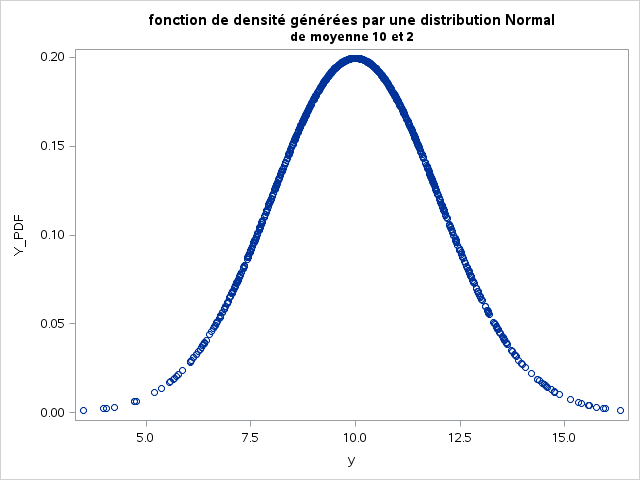
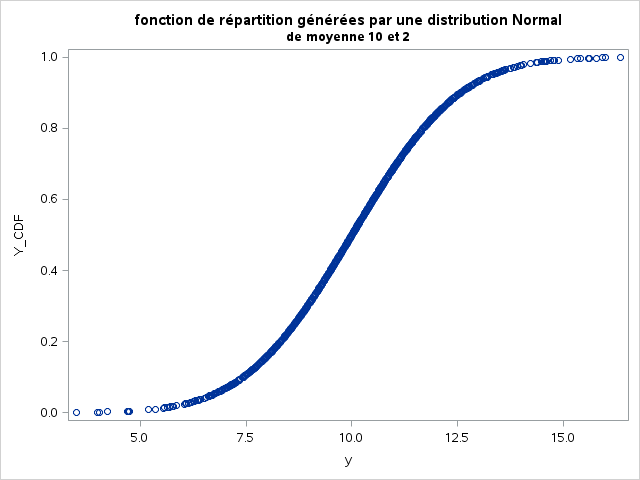

In [36]:
%NromACT(10, 2,123);

# Question 2
Faite le même exercice que la question #1, mais cette fois, l'utilisateur veut une distribution exponentielle avec une moyenne $\lambda$ que ce dernier peut choisir.

In [ ]:

%macro genExpo(lambda, seed);
	data exponential (drop=i);
 		call streaminit(&seed);
 		do i=1 to 1000;
    		x=rand('exponential',&lambda); /* car uniform de 0 a 1 */
    		y_pexp=pdf("EXPO", x);
    		y_cexp=cdf("EXPO", x);
     		output;
		end;
	run;
	title "avec proc print";
	proc print data=exponential (obs=3);
	run;
	proc sql outobs=3;
	title "avec procSQL";
		select * from work.exponential;
	quit;
	title "fonction de masse";
	
	proc sgplot data=exponential;
		scatter x=x y=y_pexp;
	run;
	title "CDF";
	proc sgplot data=exponential;
		scatter x=x y=y_cexp;
	run;
%mend genExpo;
%genExpo(2, 3035);

# Question 3

Soit les données du [programme Roulez électrique](https://raw.githubusercontent.com/nmeraihi/data/master/roulez-electrique-2017-juillet.csv). Ce programme offre un rabais à l'achat ou à la location aux particuliers, aux entreprises, aux organismes et aux municipalités du Québec qui souhaitent faire l'acquisition d'un véhicule entièrement électrique, hybride rechargeable, hybride ou électrique à basse vitesse, ou encore d’une motocyclette électrique. Il inclut également un soutien financier pour l'achat et l'installation de bornes de recharge à domicile.

In [9]:
libname sol4 "data";
filename REFFILE url "https://raw.githubusercontent.com/nmeraihi/data/master/roulez-electrique-2017-juillet.csv";
proc import datafile=REFFILE
    DBMS=csv
    replace
    out=sol4.Roul3;
    getnames=YES;
run;

proc sql outobs=5;
    title "Appeçu des données du programme Roulez électrique";
    select * 
    from sol4.Roul3
    order by Date
    ;
quit;

Date,Marque,Modele,Annee_modele,Type,Aide_financiere,Demandeur
2012-01-10,Nissan,Leaf,2012,VEE,"8,000",Particulier
2012-01-13,Chevrolet,Volt,2012,VHR,"7,769",Particulier
2012-01-20,Chevrolet,Volt,2012,VHR,"7,769",Particulier
2012-01-20,Nissan,Leaf,2012,VEE,"8,000",Particulier
2012-01-23,Nissan,Leaf,2012,VEE,"8,000",Particulier


## a)
Faites un tableau qui donne un sommaire des montants payés par ce programme par type de demandeur. Dans votre tableau, on s'attend à voir deux colonnes; "Demandeur", et "Montant_paye"

In [24]:
proc sql outobs=5;
    title"Montant payé par type de demandeur";
    select Demandeur, sum(Aide_financiere) as Montant_paye fromat=dollar15.2
    from sol4.Roul3
    group by Demandeur
    order by Demandeur
    ;
quit;

Demandeur,Montant_paye
Entreprise,"$15,211,218.00"
Municipalit,"$1,641,373.00"
Particulier,"$113,647,363.00"


## b)
Faites un tableau qui donne un sommaire des montants payés par ce programme par type véhicule `Type`. Dans votre tableau, on s'attend à voir deux colonnes; "Type de véhicule", et "Montant total payé"

## c)
Faites un tableau qui donne un sommaire des montants payés par ce programme par année. Dans votre tableau, on s'attend à voir deux colonnes; "Année financière", et "Montant total payé"

In [25]:
proc sql outobs=5;
    title"Montant payé par année finacière";
    select year(Date) as Dyear label "Année financière", sum(Aide_financiere) as Montant_paye fromat=dollar15.2 label "Montant total payé"
    from sol4.Roul3
    group by Dyear
    order by Dyear
    ;
quit;

Année financière,Montant total payé
2012,"$10,226,795.00"
2013,"$10,194,412.00"
2014,"$20,226,556.00"
2015,"$24,345,703.00"
2016,"$38,610,270.00"


## d)
Même question qu'en **c)**, mais cette fois, on veut voir l'évolution du **nombre** de rabais et de remboursements accordés par année financière

In [32]:
proc sql outobs=5;
    title"Nombre de rabais et de remboursements accordés";
    select year(Date) as year label "Année financière", count(Aide_financiere) as nombre label "Nombre"
    from sol4.Roul3
    group by year
    order by year
    ;
quit;

Année financière,Nombre
2012,4861
2013,2892
2014,6497
2015,7302
2016,10405


## e)
La même question qu'en **d)** mais cette fois, on veut seulement le nombre de rabais et de remboursements accordés pour les **véhicules**.

In [35]:
proc sql outobs=5;
    title"Nombre de rabais et de remboursements accordés";
    select year(Date) as year label "Année financière", count(Aide_financiere) as nombre label "Nombre"
    from sol4.Roul3
/*     where type like "%V%" */
    where type not like "%Bor%"
    group by year
    order by year
    ;
quit;

Année financière,Nombre
2012,4659
2013,2373
2014,5403
2015,5982
2016,8116
